In [5]:
import pandas as pd
import numpy as np
import altair as alt

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [22]:
dataset = pd.read_csv('../../rawdata/traffic-flow/trafficflow.csv', error_bad_lines=False)

In [23]:
dataset.head()

,Time (GMT),bus,car,motorcycle,truck,Grand Total
0,10/12/18 20:36:01,2.0,2.0,NaN,3.0,7
1,10/12/18 20:37:01,1.0,6.0,NaN,1.0,8
2,10/12/18 20:38:02,NaN,2.0,NaN,3.0,5
3,10/12/18 20:39:01,1.0,5.0,NaN,NaN,6
4,10/12/18 20:40:02,1.0,2.0,NaN,NaN,3


In [24]:
dataset['datetime'] = pd.to_datetime(dataset['Time (GMT)'], format='%d/%m/%y %H:%M:%S')
dataset['datetime'] = dataset['datetime'].dt.tz_localize('utc').dt.tz_convert('US/Eastern')
dataset.set_index(['datetime'], inplace = True)
dataset.drop(columns=['Time (GMT)'], inplace=True)
dataset.fillna(value=0, inplace=True)

In [25]:
dataset.rename(columns={'Grand Total' : 'total'}, inplace=True)

In [26]:
dataset = dataset.resample('H').agg({'bus': 'sum', 'car': 'sum', 'motorcycle': 'sum', 'truck': 'sum', 'total':'sum'})

In [30]:
dataset.sort_index(ascending=False, inplace=True)

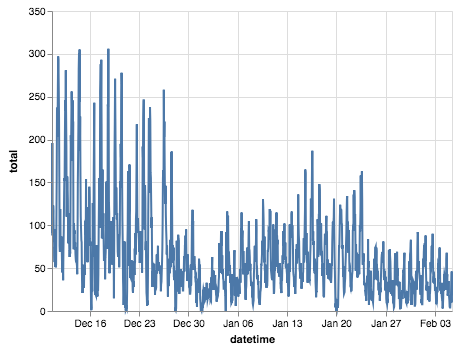

In [40]:
alt.Chart(dataset.reset_index()).mark_line().encode(
    x='datetime:T',
    y='total:Q'
)

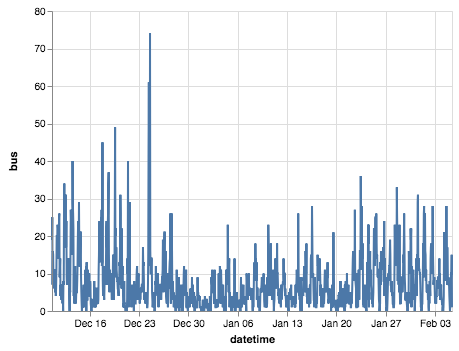

In [38]:
alt.Chart(dataset.reset_index()).mark_line().encode(
    x='datetime:T',
    y='bus'
)

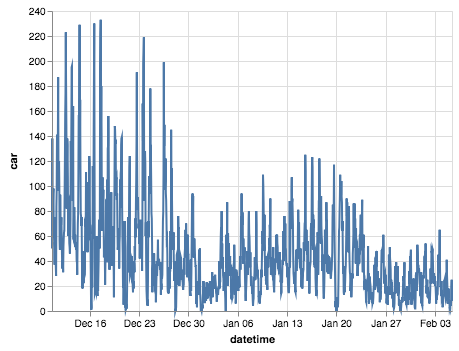

In [36]:
alt.Chart(dataset.reset_index()).mark_line().encode(
    x='datetime',
    y='car'
)

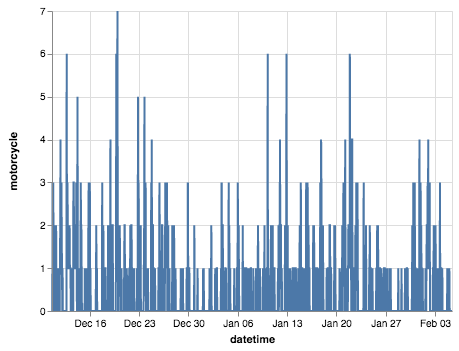

In [37]:
alt.Chart(dataset.reset_index()).mark_line().encode(
    x='datetime',
    y='motorcycle'
)